# GIS Exercise 6: Clip Vector Data with Geopandas

## For WR514: GIS and Data Analysis in Natural Resources

Completed by A.J. Brown on 13 April 2023

Adapted from: https://geopandas.org/en/stable/gallery/plot_clip.html

Learn how to clip geometries to the boundary of a polygon geometry using GeoPandas.

The example below shows you how to clip a set of vector geometries to the spatial extent / shape of another vector object. Both sets of geometries must be opened with GeoPandas as GeoDataFrames and be in the same Coordinate Reference System (CRS) for the clip function in GeoPandas to work.

This example uses GeoPandas example data 'naturalearth_cities' and 'naturalearth_lowres', alongside a custom rectangle geometry made with shapely and then turned into a GeoDataFrame.

<div class="alert alert-block alert-info">
<b>Note:</b> The object to be clipped will be clipped to the full extent of the clip object. If there are multiple polygons in clip object, the input data will be clipped to the total boundary of all polygons in clip object.
</div>

In [14]:
# Import modules
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
import geopandas
from shapely.geometry import Polygon

In [49]:
#Import and create data
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## World Map

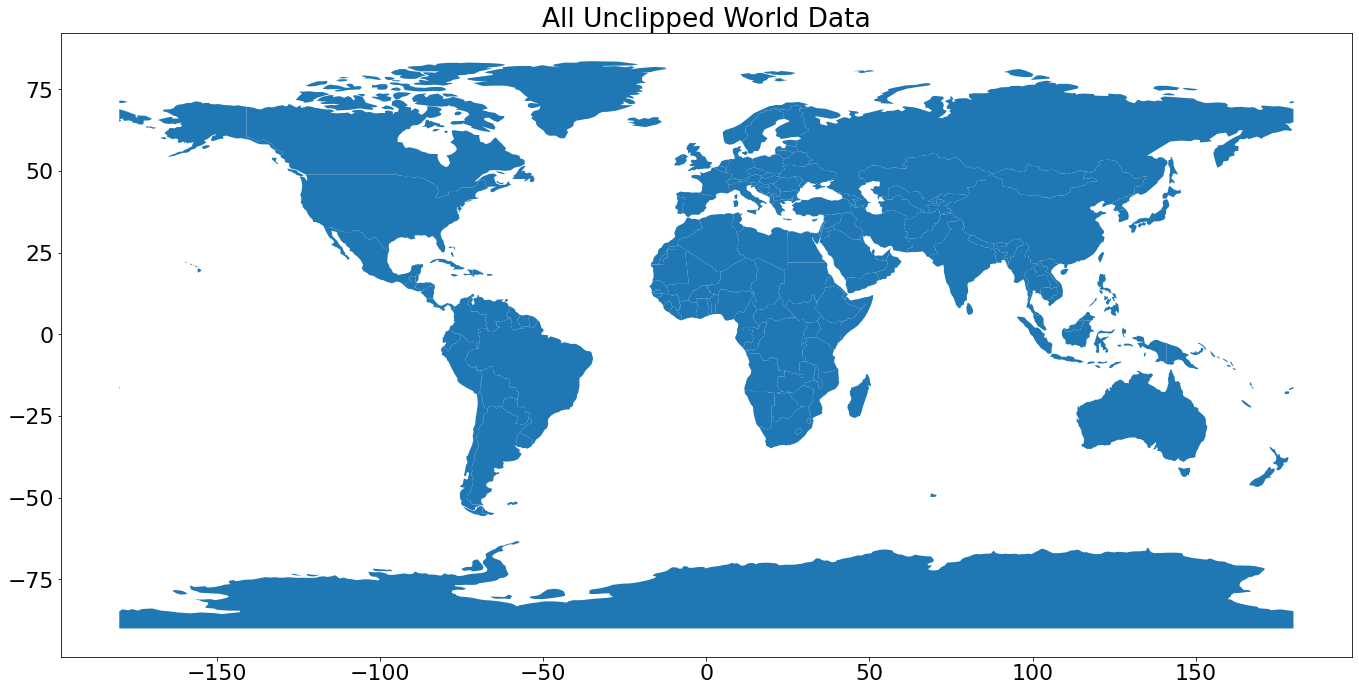

In [34]:
ax = world.plot()
ax.set_title("All Unclipped World Data")
plt.tight_layout()
plt.savefig('world.png')

## Clip Boundary

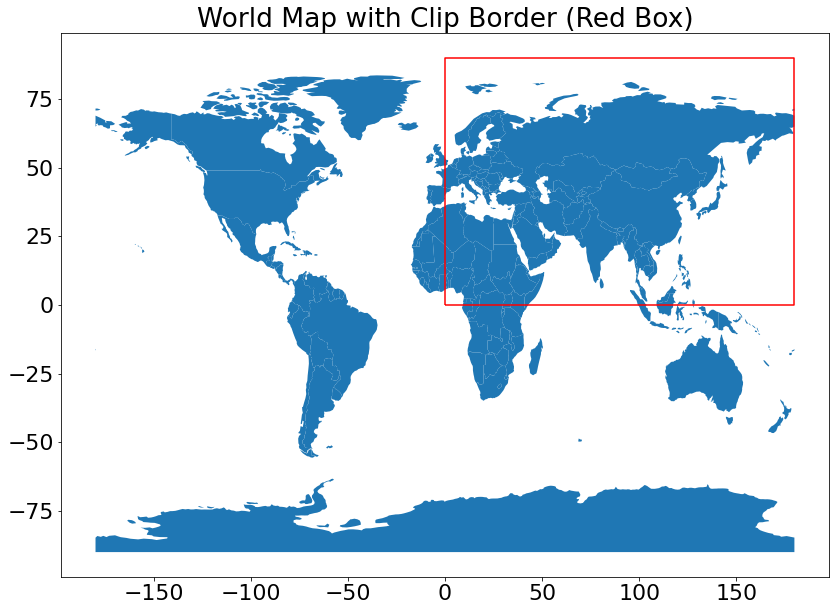

<Figure size 1440x720 with 0 Axes>

In [31]:
ax = world.plot()
ax.set_title("World Map with Clip Border (Red Box)")
poly_gdf.boundary.plot(ax=ax, color="red")
plt.tight_layout()
plt.savefig('clip-boundary.png')

## Clip the data inside the red polygon

In [48]:
# note that I may need to update geopandas or use this notattion b/c the tutorial method fails; it calls pandas clip() not gpd.clip()
world_clipped = geopandas.clip(world, polygon)
world_clipped

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((117.88203 4.13755, 117.31323 3..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((17.69083 0.00000, 17.82654 0.28892, ..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((40.99018 0.00000, 40.98105 2.78452, ..."
...,...,...,...,...,...,...
171,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


## Plot the Clip

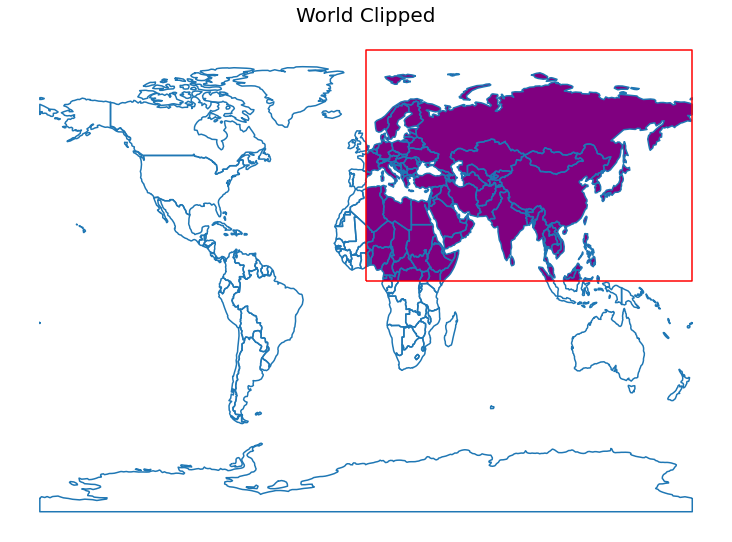

In [45]:
# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('clip-map.png')
plt.show()